In [34]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import warnings
import time
warnings.filterwarnings('ignore')

In [35]:
(X_train, Y_train), (X_test, Y_test)= keras.datasets.mnist.load_data()

In [36]:
len(X_train)

60000

In [37]:
len(X_test)

10000

In [38]:
X_train[0].shape

(28, 28)

In [39]:
#rescale values
X_train=X_train/255
X_test=X_test/255

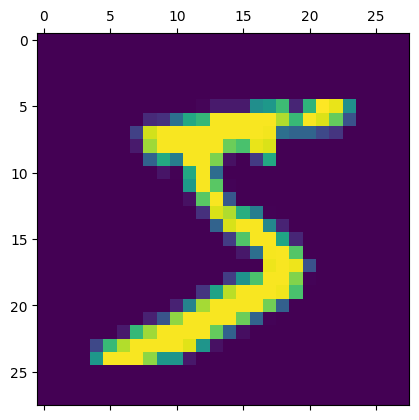

In [40]:
plt.matshow(X_train[0])

In [41]:
# lable of the X_train[0]
Y_train[0]

5

In [42]:
X_train.shape

(60000, 28, 28)

In [10]:
# convert 28*28 array into a 1d 784 array
#len(60k, 28*28)
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [11]:
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [12]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
start_time=time.time()

model= keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened,Y_train, epochs=5)

end_time=time.time()

elapsed_time= end_time-start_time
print(f"Total time taken {elapsed_time}")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8135 - loss: 0.7242
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9159 - loss: 0.3096
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9206 - loss: 0.2843
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9237 - loss: 0.2741
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9264 - loss: 0.2667
Total time taken 11.607317209243774


In [18]:
model.evaluate(X_test_flattened, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.9150 - loss: 0.3013


[0.2655685842037201, 0.9262999892234802]

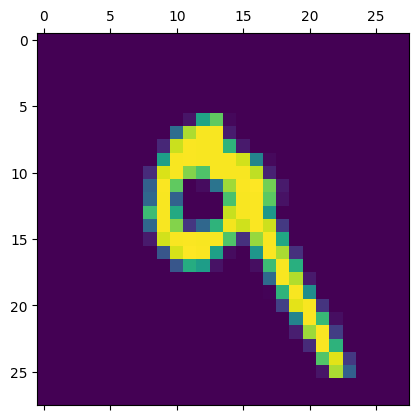

In [19]:
plt.matshow(X_test[7])

In [20]:
Y_predicted=model.predict(X_test_flattened)
Y_predicted[7]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step


array([2.0028137e-06, 1.7562827e-01, 1.6625414e-02, 3.6509845e-02,
       3.3256352e-01, 2.1904218e-01, 1.3654589e-03, 1.7962810e-02,
       1.2909515e-01, 9.8683858e-01], dtype=float32)

In [21]:
np.argmax(Y_predicted[7])

9

In [22]:
Y_predicted_lables=[np.argmax(i) for i in Y_predicted]
Y_predicted_lables[:5]

[7, 2, 1, 0, 4]

In [23]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

Text(70.72222222222221, 0.5, 'Truth')

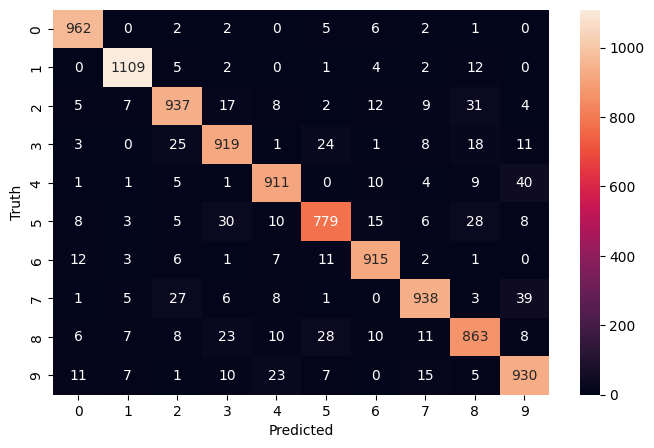

In [24]:
cm=tf.math.confusion_matrix(labels=Y_test, predictions=Y_predicted_lables)
cm

import seaborn as sb

plt.figure(figsize=(8,5))
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [25]:
start_time= time.time()

model= keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation="relu"),
    keras.layers.Dense(10 ,activation="sigmoid")
    
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened,Y_train, epochs=5)

end_time=time.time()

elapsed_time=end_time-start_time

print(f"Total time taken {elapsed_time}")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8696 - loss: 0.4583
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9616 - loss: 0.1330
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9723 - loss: 0.0925
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9810 - loss: 0.0638
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9845 - loss: 0.0521
Total time taken 17.870816707611084


In [26]:
model.evaluate(X_test_flattened, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9714 - loss: 0.0919


[0.0787879228591919, 0.9758999943733215]

In [28]:
Y_predicted=model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [29]:
Y_predicted_lables=[np.argmax(i) for i in Y_predicted]

Text(70.72222222222221, 0.5, 'Truth')

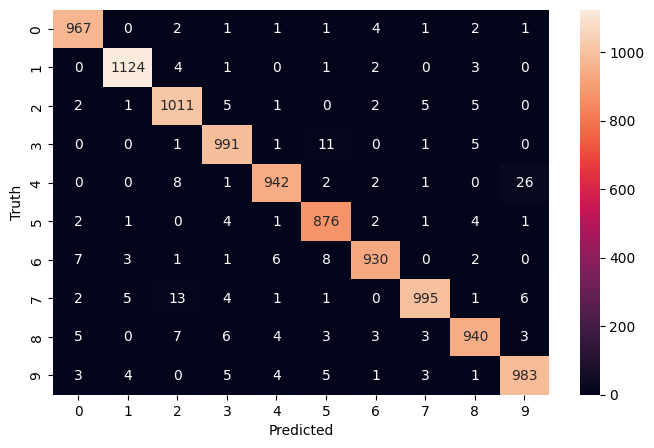

In [30]:
cm=tf.math.confusion_matrix(labels=Y_test, predictions=Y_predicted_lables)
cm

import seaborn as sb

plt.figure(figsize=(8,5))
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [44]:
start_time= time.time()

model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10 ,activation="sigmoid")
    
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,Y_train, epochs=5)

end_time=time.time()

elapsed_time=end_time-start_time

print(f"Total time taken {elapsed_time}")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8716 - loss: 0.4543
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9603 - loss: 0.1325
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9739 - loss: 0.0876
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9812 - loss: 0.0640
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9851 - loss: 0.0497
Total time taken 19.295215845108032
